In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
filename = 'C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW_Extra/Wine-master/winemag-data-130k-v2.csv'
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
#checking the properties of data:

print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(data.variety.unique()),
                                                                           ", ".join(data.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(data.country.unique()),
                                                                                      ", ".join(data.country.unique()[0:5])))

There are 129971 observations and 14 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [6]:
data[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [7]:
# Groupby by country
country = data.groupby("country")

# Summary statistic of all countries
country.describe().head()

Unnamed: 0                                       \
                            count          mean           std      min   
country                                                                  
Argentina                  3800.0  65075.723158  38080.749866     16.0   
Armenia                       2.0  37158.000000  40995.222746   8170.0   
Australia                  2329.0  65037.539287  37271.655310     77.0   
Austria                    3345.0  65614.296861  37455.323032     93.0   
Bosnia and Herzegovina        2.0  56613.000000  56775.017675  16467.0   

                                                               points  \
                             25%      50%       75%       max   count   
country                                                                 
Argentina               30912.25  65171.5  99149.25  129948.0  3800.0   
Armenia                 22664.00  37158.0  51652.00   66146.0     2.0   
Australia               34120.00  64984.0  96027.00  129726.0  2329.0   
Austria                 32623.00  67701.0  98385.00  129939.0  3345.0   
Bosnia and Herzegovina  36540.00  56613.0  76686.00   96759.0     2.0   

                                   ...                 price             \
                             mean  ...    75%    max   count       mean   
country                            ...                                    
Argentina               86.710263  ...  89.00   97.0  3756.0  24.510117   
Armenia                 87.500000  ...  87.75   88.0     2.0  14.500000   
Australia               88.580507  ...  91.00  100.0  2294.0  35.437663   
Austria                 90.101345  ...  92.00   98.0  2799.0  30.762772   
Bosnia and Herzegovina  86.500000  ...  87.25   88.0     2.0  12.500000   

                                                                     
                              std   min    25%   50%    75%     max  
country                                                              
Argentina               23.430122   4.0  12.00  17.0  25.00   230.0  
Armenia                  0.707107  14.0  14.25  14.5  14.75    15.0  
Australia               49.049458   5.0  15.00  21.0  38.00   850.0  
Austria                 27.224797   7.0  18.00  25.0  36.50  1100.0  
Bosnia and Herzegovina   0.707107  12.0  12.25  12.5  12.75    13.0  

[5 rows x 24 columns]

In [8]:
country.mean().sort_values(by="points",ascending=False).head()

,Unnamed: 0,points,price
country,,,
England,72597.756757,91.581081,51.681159
India,68964.000000,90.222222,13.333333
Austria,65614.296861,90.101345,30.762772
Germany,65787.590762,89.851732,42.257547
Canada,70582.365759,89.369650,35.712598


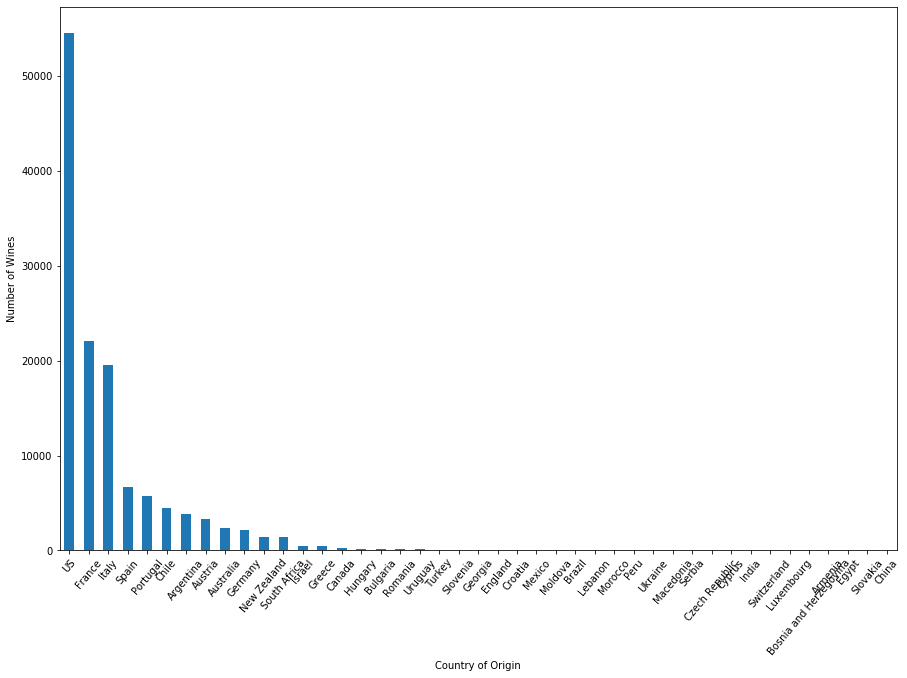

In [9]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

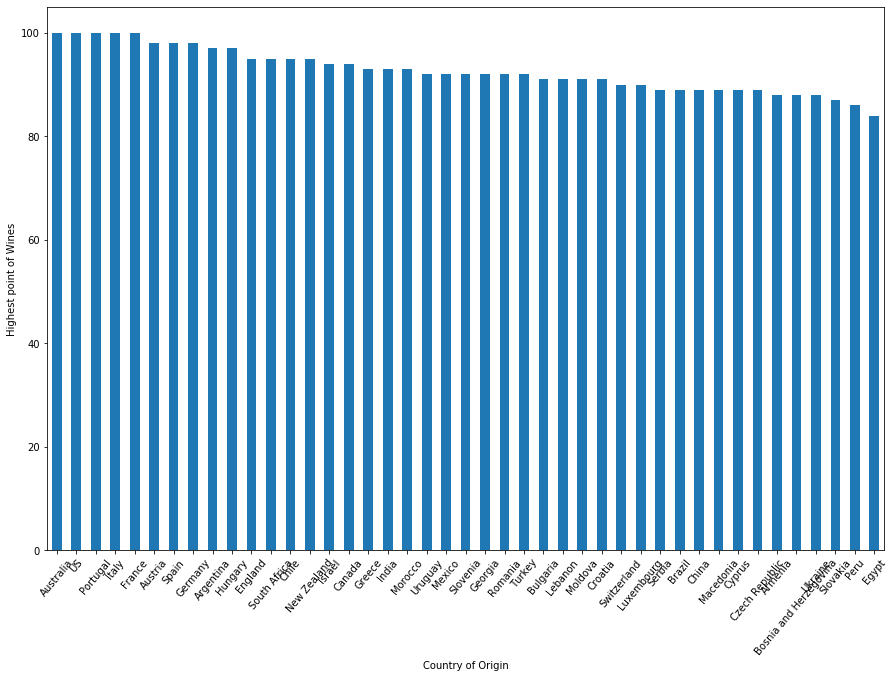

In [10]:
plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [14]:
data.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [18]:
#wordcloud

# Start with one review:
text = data.description[0] + data.description[1]
text

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016."

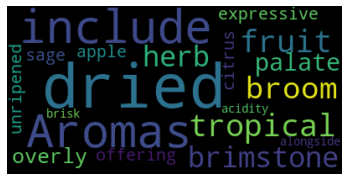

In [19]:
# generating wordcloud image
wordcloud = WordCloud().generate(data.description[0])

# image display:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

martin-luther-king-i-have-a-dream-speech.txt

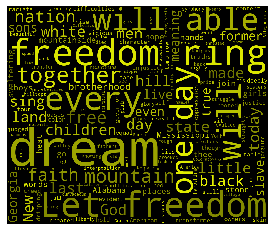

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

file_content=open ("C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW_Extra/Wine-master/martin-luther-king-i-have-a-dream-speech.txt").read()

wordcloud = WordCloud(     
                            stopwords = STOPWORDS,
                            background_color = 'black',
                            width = 1200,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()



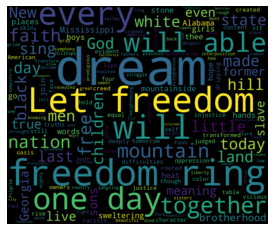

In [26]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()